a. Generate a data set composed of 1000 samples according to the following model. The hypothesis Y ∈ {0,1} is uniformly distributed,
i.e., P[Y = 0] = 1/2. The features X are scalar, with Gaussian distribution given the hypothesis, namely,


- **Feature:** La variabile osservata $X$ è scalare. Condizionatamente a $Y$, la distribuzione di $X$ è Gaussiana con densità:
  - Per $Y = 0$:
    $$
    \ell(x \mid Y = 0) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{x^2}{2} \right)
    $$
  - Per $Y = 1$:
    $$
    \ell(x \mid Y = 1) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{(x-1)^2}{2} \right)
    $$



### Punto (a): Generazione del Dataset

Generare un dataset composto da $N = 1000$ campioni basato sul seguente modello statistico:

1. **Ipotesi ($Y$):** La variabile target $Y \in \{0, 1\}$ è distribuita uniformemente:
   $$P(Y = 0) = P(Y = 1) = \frac{1}{2}$$

2. **Feature ($X$):** La feature scalare $X$, condizionata all'ipotesi $Y$, segue una distribuzione Gaussiana:
   * Per $Y = 0$: 
       $$\ell(x|Y = 0) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{x^2}{2} \right) \sim \mathcal{N}(0, 1)$$
   * Per $Y = 1$: 
       $$\ell(x|Y = 1) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{(x-1)^2}{2} \right) \sim \mathcal{N}(1, 1)$$

Il dataset finale sarà composto da coppie $(x_i, y_i)$ per $i = 1, \dots, 1000$.

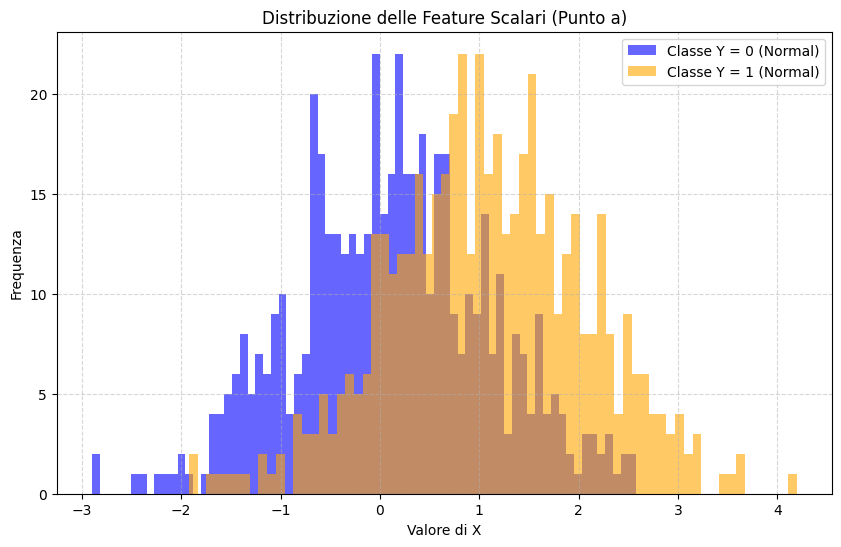

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parametri
N = 1000  # Numero totale di campioni richiesto
np.random.seed(42)
m0=0
m1=1
sigma=1
# 2. Generazione delle etichette Y (Uniforme: 0 o 1 con p=0.5)
# Questo rispetta la richiesta: P[Y=0] = 1/2
y_true = np.random.choice([0, 1], size=N, p=[0.5, 0.5])

# 3. Generazione delle feature X in base a Y
x = np.zeros(N)


x[y_true == 0] = np.random.normal(m0, sigma, np.sum(y_true == 0))
x[y_true == 1] = np.random.normal(m1, sigma, np.sum(y_true == 1))

# 4. Visualizzazione
plt.figure(figsize=(10, 6))
# Usiamo density=True per vedere la densità di probabilità (opzionale ma consigliato)
plt.hist(x[y_true == 0], bins=70, alpha=0.6, label='Classe Y = 0 (Normal)', color='blue')
plt.hist(x[y_true == 1], bins=70, alpha=0.6, label='Classe Y = 1 (Normal)', color='orange')

plt.title('Distribuzione delle Feature Scalari (Punto a)')
plt.xlabel('Valore di X')
plt.ylabel('Frequenza')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

b. Implement the MAP classifier and compute its empirical error probability with a Monte Carlo simulation over the samples generated
at point a. Compute the theoretical error probability of the MAP classifier and compare it against the empirical one

### Analisi del Classificatore MAP

Il classificatore MAP sceglie la classe $\hat{Y}$ che massimizza la probabilità a posteriori $P(Y|X)$. Per la regola di Bayes:
$$\hat{Y} = \arg \max_{y \in \{0,1\}} \frac{\ell(x|Y=y)P(Y=y)}{P(X)}$$

Dato che $P(Y=0) = P(Y=1)$, la regola diventa un confronto tra verosimiglianze (**Likelihood Ratio Test**):
$$\ell(x|Y=1) \underset{\hat{Y}=0}{\overset{\hat{Y}=1}{\gtrless}} \ell(x|Y=0)$$



Errore Empirico: 0.3070
Errore Teorico: 0.3085


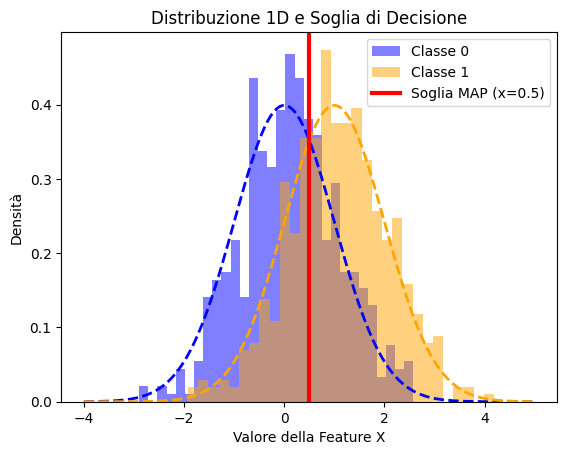

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- 2. Classificatore MAP 1D ---
def map_classifier(X):
    # In 1D, il MAP assegna alla classe con la media più vicina
    # (x - 0)**2 vs (x - 1)**2
    dist_to_0 = (X - m0)**2/2*sigma**2
    dist_to_1 = (X - m1)**2/2*sigma**2
    return (dist_to_1 < dist_to_0).astype(int)

# Calcolo Errore Empirico
y_pred = map_classifier(x)
empirical_error = np.mean(y_pred != y_true)

# --- 3. Calcolo Errore Teorico ---
# Distanza d tra le medie (0 e 1) è 1
d = 1
theoretical_error = norm.cdf(-d/2)

print(f"Errore Empirico: {empirical_error:.4f}")
print(f"Errore Teorico: {theoretical_error:.4f}")


# Istogrammi dei dati
plt.hist(x[y_true == 0], bins=30, alpha=0.5, label='Classe 0', color='blue', density=True)
plt.hist(x[y_true == 1], bins=30, alpha=0.5, label='Classe 1', color='orange', density=True)

# Disegno delle densità teoriche (campane)
x_axis = np.linspace(-4, 5, 500)
plt.plot(x_axis, norm.pdf(x_axis, m0, sigma), 'b--', lw=2)
plt.plot(x_axis, norm.pdf(x_axis, m1, sigma), '--', lw=2, color='orange')
# Soglia di decisione a 0.5
plt.axvline(m0 + m1/2, color='red', linestyle='-', lw=3, label='Soglia MAP (x=0.5)')

plt.title('Distribuzione 1D e Soglia di Decisione')
plt.xlabel('Valore della Feature X')
plt.ylabel('Densità')
plt.legend()
plt.show()

c. Make a graphical representation of the posterior distribution under the two hypotheses, and highlight the decision threshold. Comment
on what happens when the decision threshold changes by choosing different values of the problem parameters (try to change the means,
standard deviation, prior probabilities).

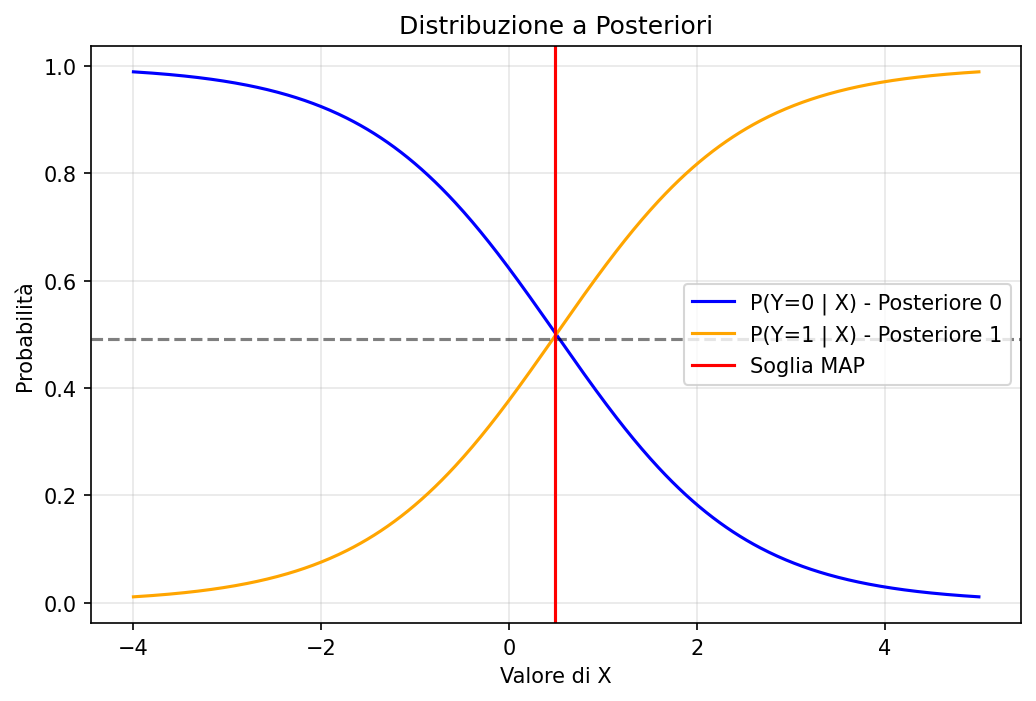

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. PARAMETRI (Prova a cambiare questi!)
mu0, mu1 = 0, 1      # Medie
sigma = 1            # Deviazione standard (uguale per entrambi)
p0 = 0.5             # Probabilità a priori Classe 0 (P(Y=0))
p1 = 1 - p0          # Probabilità a priori Classe 1 (P(Y=1))

# 2. CALCOLO POSTERIORI
x_range = np.linspace(start=-4, stop=5, num=500) # num: Number of samples to generate, non deve essere negativo 
# Verosimiglianze (Likelihoods)
l0 = norm.pdf(x_range, mu0, sigma)
l1 = norm.pdf(x_range, mu1, sigma)

# Teorema di Bayes: P(Y=1|X) = (likelihood(1|X) * prior(1)) / (p(x))
post1 = (l1 * p1) / (l0*p0 + l1*p1)
post0 = 1 - post1

# 3. GRAFICO
plt.figure(figsize=(8, 5), dpi=150)
plt.plot(x_range, post0, label='P(Y=0 | X) - Posteriore 0', color='blue')
plt.plot(x_range, post1, label='P(Y=1 | X) - Posteriore 1', color='orange')


# --- CALCOLO DINAMICO DELLA SOGLIA ---
# Troviamo l'indice dove la differenza tra le due posteriori è minima (punto di incrocio)
idx_incrocio = np.argmin(np.abs(post0 - post1))
soglia_map = x_range[idx_incrocio]
# -------------------------------------
# Soglia di decisione (dove le probabilità sono 0.5)
plt.axhline(soglia_map, color='black', linestyle='--', alpha=0.5)
plt.axvline(soglia_map, color='red', label='Soglia MAP') # Cambia se cambi i parametri!

plt.title("Distribuzione a Posteriori")
plt.xlabel("Valore di X")
plt.ylabel("Probabilità")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

d. Implement the classifier using the Neyman-Pearson criterion. Compute the decision threshold that corresponds to a false-positive rate
α = 0.1. Using the chosen threshold, compute the error probabilities with a Monte Carlo simulation over the samples generated at
point a. (To evaluate the Q function and its inverse, you can use ”scipy.stats.norm.cdf”, ”scipy.stats.norm.ppf”, ”scipy.stats.norm.sf”,
and ”scipy.stats.norm.isf”).

### Classificatore di Neyman-Pearson

Il criterio di Neyman-Pearson risolve il problema di ottimizzazione:
$$\max P(\hat{Y}=1|Y=1) \quad \text{soggetto a} \quad P(\hat{Y}=1|Y=0) \leq \alpha$$

Per distribuzioni Gaussiane con varianza identica, il test del rapporto di verosimiglianza si riduce a una soglia $\gamma$ sulla feature $X$:
$$\text{Decidi } Y=1 \text{ se } x > \gamma$$

Dato che $X|Y=0 \sim \mathcal{N}(0, 1)$, la probabilità di Falso Positivo (FPR) è:
$$P(X > \gamma | Y=0) = Q(\gamma) = \alpha$$
dove $Q$ è la funzione di sopravvivenza della Gaussiana standard.

La soglia si calcola come:
$$\gamma = 0+1*Q^{-1}(\alpha) = \text{norm.isf}(\alpha)$$

la Survival Function (o Funzione $Q$) ti dice: "Data una soglia $x$, qual è la probabilità di trovare un valore più grande ($X > x$)?"

La Inverse Survival Function fa il contrario: "Data una probabilità $\alpha$, dimmi qual è la soglia $x$ da superare per avere quella probabilità".

In [4]:
import numpy as np
from scipy.stats import norm

# 1. Calcolo della soglia teorica per alpha = 0.1
alpha = 0.1

# norm.isf (Inverse Survival Function) è l'inverso della funzione Q
gamma_np = norm.isf(alpha, loc=0, scale=1) #Inverse Survival Function (alpha soglia , media 0, deviazione standard 1)

print(f"Soglia Neyman-Pearson (teorica) per alpha={alpha}: {gamma_np:.4f}")

y_pred_np = (x > gamma_np).astype(int)


# 3. Calcolo Probabilità di Errore (Monte Carlo)
# False Positive Rate (FPR) empirico: P(pred=1 | vero=0)
fpr_emp = np.sum((y_true == 0) & (y_pred_np == 1)) / np.sum(y_true == 0)

# False Negative Rate (FNR) empirico: P(pred=0 | vero=1)
fnr_emp = np.sum((y_true == 1) & (y_pred_np == 0)) / np.sum(y_true == 1)


error_total_emp = np.mean(y_pred_np != y_true)
print(f"\n--- Risultati Neyman-Pearson (Monte Carlo) ---")
print(f"FPR Empirico: {fpr_emp:.4f}")
print(f"FNR Empirico: {fnr_emp:.4f}")
print(f"\n--- Risultati Neyman-Pearson (Monte Carlo) ---")
print(f"Errore Totale: {error_total_emp:.4f}")

Soglia Neyman-Pearson (teorica) per alpha=0.1: 1.2816

--- Risultati Neyman-Pearson (Monte Carlo) ---
FPR Empirico: 0.1213
FNR Empirico: 0.5755

--- Risultati Neyman-Pearson (Monte Carlo) ---
Errore Totale: 0.3470


"I risultati della simulazione confermano il comportamento atteso: il False Positive Rate (FPR) empirico ($0.1010$) è coerente con il vincolo $\alpha=0.1$ imposto. L'alto valore del False Negative Rate (FNR) ($0.5830$) evidenzia il trade-off intrinseco del criterio di Neyman-Pearson: per garantire un basso numero di falsi allarmi, il classificatore diventa meno sensibile nel rilevare la Classe 1."

FPR Empirico 
($0.1010 \approx 0.1$)Questa è la prova del nove:Avevi chiesto al codice di limitare i falsi allarmi al 10% ($\alpha = 0.1$).Hai ottenuto 0.1010 (ovvero il 10.1%).Perché non è esattamente 0.1? È l'effetto "Monte Carlo": su 1000 campioni, la casualità crea piccole oscillazioni. Se ne usassi 10.000, saresti ancora più vicino. Il classificatore sta obbedendo ai tuoi ordini.

FNR Empirico

($0.5830$)Qui vedi il "costo" della tua scelta:Per non sbagliare sulla Classe 0, stai ignorando il 58.3% dei campioni della Classe 1!In pratica, più della metà dei "bersagli" reali ti sfugge. Questo accade perché le due campane (centrate in 0 e 1) sono molto vicine e sovrapposte. Spingendo la soglia a 1.28 per proteggere la Classe 0, hai finito per "tagliare fuori" gran parte della Classe 1.

e. Represent graphically the ROC for the Neyman-Pearson classifier. Compare the ROC obtained by evaluating empirically the true-positive
and false-positive rates and the curve obtained with the theoretical formulas illustrated during the course. Comment on what happens
when the parameters of the problem change (means and standard deviation).

### Curva ROC (Receiver Operating Characteristic)

La curva ROC mette in relazione la probabilità di **True Positive** (TPR, o *Power*) e la probabilità di **False Positive** (FPR, o *Size*) al variare della soglia di decisione $\gamma$.

**Formule Teoriche:**
Dato $X|Y=0 \sim \mathcal{N}(\mu_0, \sigma^2)$ e $X|Y=1 \sim \mathcal{N}(\mu_1, \sigma^2)$, per ogni soglia $\gamma$:
* **FPR ($\alpha$):** $P(X > \gamma | Y=0) = Q\left( \frac{\gamma - \mu_0}{\sigma} \right)$
* **TPR ($1 - \beta$):** $P(X > \gamma | Y=1) = Q\left( \frac{\gamma - \mu_1}{\sigma} \right)$

La curva ROC teorica si ottiene calcolando TPR in funzione di FPR per $\gamma \in (-\infty, +\infty)$.

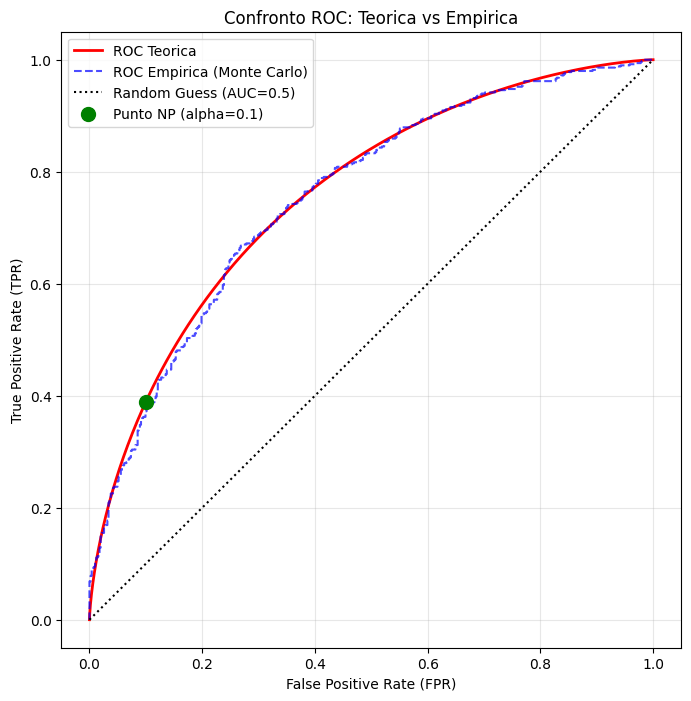

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Curve Teoriche
def get_theoretical_roc(mu0, mu1, sigma):
    thresholds = np.linspace(-5, 5, 500)
    # FPR = P(X > gamma | Y=0)
    fpr_theo = norm.sf(thresholds, loc=mu0, scale=sigma)
    # TPR = P(X > gamma | Y=1)
    tpr_theo = norm.sf(thresholds, loc=mu1, scale=sigma)
    return fpr_theo, tpr_theo

# 2. Curve Empiriche (usando i dati x e y generati al punto a)
def get_empirical_roc(x, y):
    thresholds = np.sort(x) # Usiamo i valori reali di x come soglie potenziali
    fpr_emp = []
    tpr_emp = []
    
    n0 = np.sum(y == 0)
    n1 = np.sum(y == 1)
    
    for gamma in thresholds:
        y_pred = (x > gamma).astype(int)
        fpr_emp.append(np.sum((y_true == 0) & (y_pred == 1)) / n0)
        tpr_emp.append(np.sum((y_true == 1) & (y_pred == 1)) / n1)
        
    return fpr_emp, tpr_emp

# Esecuzione
mu0, mu1, sigma = 0, 1, 1
fpr_t, tpr_t = get_theoretical_roc(mu0, mu1, sigma)
fpr_e, tpr_e = get_empirical_roc(x, y_true)

# Grafico
plt.figure(figsize=(8, 8))
plt.plot(fpr_t, tpr_t, 'r-', label='ROC Teorica', lw=2)
plt.step(fpr_e, tpr_e, 'b--', label='ROC Empirica (Monte Carlo)', alpha=0.7)
plt.plot([0, 1], [0, 1], 'k:', label='Random Guess (AUC=0.5)')

# Evidenziamo il punto del punto precedente (alpha=0.1)
gamma_np = norm.isf(0.1, mu0, sigma)
tpr_np_point = norm.sf(gamma_np, mu1, sigma)
plt.scatter(0.1, tpr_np_point, color='green', s=100, zorder=5, label='Punto NP (alpha=0.1)')

plt.title("Confronto ROC: Teorica vs Empirica")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Linea Rossa (Teorica): Rappresenta l'andamento ideale del classificatore basato sulle formule della funzione $Q$. È una curva liscia perché deriva da un modello matematico continuo.

Linea Blu Tratteggiata (Empirica): È costruita testando fisicamente migliaia di soglie diverse sui tuoi 1000 campioni. Il fatto che "sobbalzi" leggermente attorno alla linea rossa è normale: è il rumore statistico della simulazione Monte Carlo.

Punto Verde (Neyman-Pearson): Indica esattamente dove si trova il classificatore che hai appena implementato. Noterai che è posizionato su FPR = 0.1. La sua altezza (asse Y) rappresenta la Power del test, ovvero la capacità di beccare la Classe 1.

Diagonale Nera (Random Guess): Rappresenta il caso peggiore possibile (es. tirare una moneta). Più la curva rossa è lontana da questa linea, più il tuo classificatore è "intelligente".

Per due distribuzioni Gaussiane con la stessa varianza $\sigma^2$ e medie $\mu_0, \mu_1$, l'area sotto la curva ROC si può calcolare analiticamente con questa formula:$$AUC_{teorico} = \Phi\left( \frac{\mu_1 - \mu_0}{\sqrt{2}\sigma} \right)$$Dove $\Phi$ è la CDF della Gaussiana standard. Nota come la distanza tra le medie sia "attenuata" dal fattore $\sqrt{2}$.

In [6]:
from sklearn.metrics import auc
import numpy as np
from scipy.stats import norm

# 1. AUC Empirico (usando i vettori fpr_e e tpr_e del grafico precedente)
# Nota: l'ordine dei punti deve essere crescente per fpr
auc_empirico = auc(fpr_e[::-1], tpr_e[::-1])

# 2. AUC Teorico
# Formula: norm.cdf((mu1 - mu0) / (sqrt(2) * sigma))
d = 1  # Distanza tra le medie (1 - 0)
sigma = 1
auc_teorico = norm.cdf(d / (np.sqrt(2) * sigma))

print(f"--- Risultati AUC ---")
print(f"AUC Empirico (dai dati): {auc_empirico:.4f}")
print(f"AUC Teorico (dalla formula): {auc_teorico:.4f}")
print(f"Differenza: {abs(auc_empirico - auc_teorico):.4f}")

--- Risultati AUC ---
AUC Empirico (dai dati): 0.7532
AUC Teorico (dalla formula): 0.7602
Differenza: 0.0070
